In [38]:
%matplotlib inline

In [39]:
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mtcnn import MTCNN

# Face Detection

### Setting Up The Environment

Run the following command to install the required dependencies:

In [3]:
# !pip install numpy pandas opencv-python matplotlib torch torchvision tqdm mtcnn

### Preprocessing the Dataset
Let's preprocess the datasets to standardize the input for the model. For the WIDER Face Dataset, images come in various scales and conditions, so resizing them to a uniform size will be necessary.

For the LFW Dataset, it already has labeled faces, but I want to adjust image sizes and grayscale conversion.

Here’s a basic __preprocessing function__:

In [51]:
def preprocess_images(image_dir, target_size=(224, 224)):
    images = []
    labels = []  # This will be used if you're working with labeled data like LFW
    # image_folder = os.path.join(image_dir, 'lfw-deepfunneled')  # Path to the folder containing images
    
    for root, dirs, files in os.walk(image_dir):  # Traverse through subfolders
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):  # Ensure you're processing image files
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                if img is not None:
                    # Resize image to target size
                    img = cv2.resize(img, target_size)
                    # Convert image to grayscale (optional)
                    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    images.append(img)
                   
    images = np.array(images)
    return images

Now i will preprocess both datasets by passing their image directories:

In [52]:
wf_data_path = "C:/Users/galin/Downloads/LFW dataset/lfw-deepfunneled"
lfw_images = preprocess_images(wf_data_path)

In [53]:
len(lfw_images)

13233

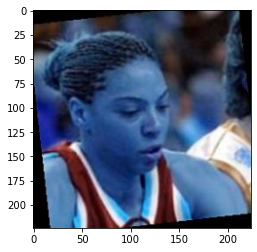

In [54]:
plt.imshow(lfw_images[140])

In [36]:
# def preprocess_images(image_dir, target_size=(224, 224)):
#     images = []
#     labels = []  # This will be used if you're working with labeled data like LFW
#     # image_folder = os.path.join(image_dir, 'images')  # Path to the folder containing images
#     for root, dirs, files in os.walk(image_dir):  # Traverse through subfolders
#         for file in files:
#             if file.endswith(('jpg', 'jpeg', 'png')):  # Ensure you're processing image files
#                 img_path = os.path.join(root, file)
#                 img = cv2.imread(img_path)
#                 if img is not None:
#                     # Resize image to target size
#                     img = cv2.resize(img, target_size)
#                     # Convert image to grayscale (optional)
#                     # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#                     images.append(img)
#                     # We can assign labels if using LFW or custom labels
#                     # labels.append(some_label)
#     images = np.array(images)
#     return images

In [ ]:
wider_images_path = "C:/Users/galin/Downloads/Wider Face dataset/WIDER_train/WIDER_train/"
wider_images = preprocess_images(wider_images_path)

In [ ]:
len(wider_images)

In [ ]:
plt.imshow(wider_images[140])

### Let's Use a Face Detection Model
The pre-trained model that i will use for face detection is MTCNN (Multi-task Cascaded Convolutional Networks):

In [ ]:
# from mtcnn import MTCNN
# import matplotlib.pyplot as plt

# # Initialize the detector
# detector = MTCNN()

# def detect_faces(image):
#     # Detect faces in the image
#     results = detector.detect_faces(image)
    
#     # Plot detected faces
#     for result in results:
#         bounding_box = result['box']
#         cv2.rectangle(image, 
#                       (bounding_box[0], bounding_box[1]), 
#                       (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]), 
#                       (0, 255, 0), 2)
    
#     # Display image
#     plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     plt.show()

# # Test on one image
# image = cv2.imread(lfw_images[140])
# detect_faces(image)


In [ ]:
# # Function to preprocess and resize images
# def preprocess_images(image_dir, target_size=(224, 224)):
#     images = []
#     image_folder = os.path.join(image_dir, 'lfw-deepfunneled')  # Path to the folder containing images
    
#     for root, dirs, files in os.walk(image_folder):  # Traverse through subfolders
#         for file in files:
#             if file.endswith(('jpg', 'jpeg', 'png')):  # Ensure you're processing image files
#                 img_path = os.path.join(root, file)
#                 img = cv2.imread(img_path)
#                 if img is not None:
#                     # Resize image to target size
#                     img = cv2.resize(img, target_size)
#                     images.append(img)
                    
#     images = np.array(images)
#     return images

# # Path to the LFW dataset
# wf_data_path = "C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset"

# # Preprocess and load LFW images
# lfw_images = preprocess_images(wf_data_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


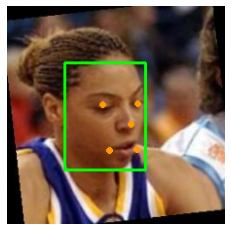

In [49]:
# Initialize the MTCNN face detector
detector = MTCNN()

# Function to detect faces in an image
def detect_faces(image):
    # Detect faces in the image
    results = detector.detect_faces(image)
    
    # Plot and annotate detected faces
    for result in results:
        bounding_box = result['box']
        keypoints = result['keypoints']
        
        # Draw rectangle around the face
        cv2.rectangle(image, 
                      (bounding_box[0], bounding_box[1]), 
                      (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]), 
                      (0, 255, 0), 2)
        
        # Annotate key points
        cv2.circle(image, keypoints['left_eye'], 2, (0, 155, 255), 2)
        cv2.circle(image, keypoints['right_eye'], 2, (0, 155, 255), 2)
        cv2.circle(image, keypoints['nose'], 2, (0, 155, 255), 2)
        cv2.circle(image, keypoints['mouth_left'], 2, (0, 155, 255), 2)
        cv2.circle(image, keypoints['mouth_right'], 2, (0, 155, 255), 2)
    
    # Convert image to RGB for displaying with matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

# Display one example image and detect faces
image = lfw_images[140]  # Select an image from the preprocessed dataset
detect_faces(image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


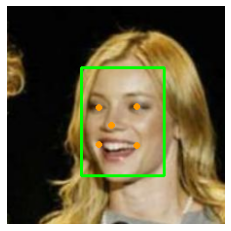

In [50]:
# Display one example image and detect faces
image = lfw_images[500]  # Select an image from the preprocessed dataset
detect_faces(image)

### Train a Custom Face Detection Model 
Let's train your own face detector, we can use a CNN-based model. Here i will use PyTorch:

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# Define a basic CNN architecture
class FaceDetectorCNN(nn.Module):
    def __init__(self):
        super(FaceDetectorCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(64*54*54, 128)
        self.fc2 = nn.Linear(128, 2)  # Binary classification: face or no face

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Prepare your data
transform = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor()])

# Use your preprocessed datasets (wider_images/lfw_images) here
train_dataset = datasets.ImageFolder(lfw_images, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize model, loss, and optimizer
model = FaceDetectorCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):  # Train for 10 epochs
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


ValueError: scandir: embedded null character in path

### Evaluation on WIDER and LFW
Evaluate the performance on both datasets:


In [ ]:
from sklearn.metrics import classification_report

# Example function to evaluate
def evaluate_model(model, test_loader):
    all_preds = []
    all_labels = []
    
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds)
        all_labels.extend(labels)
    
    print(classification_report(all_labels, all_preds))


### Visualizing Results
Visualize the model's detection results:
